In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_excel('StackOverflowInfo.xlsx')
stack_df = pd.DataFrame(temp)
display(stack_df)

,Display Name,Downvotes,Reputation,Upvotes,Views,Number Of Posts,Percent Accepted,Answers,Accepted Answers
0,Community,980920,1,274835,649,40,0.000000,0,0
1,Jeff Atwood,1309,44300,3367,408587,137,30.578512,121,37
2,Geoff Dalgas,88,3491,650,23966,10,66.666667,3,2
3,Jarrod Dixon,100,13418,7285,24396,35,31.034483,29,9
4,Joel Spolsky,96,28768,797,73755,109,46.875000,96,45
...,...,...,...,...,...,...,...,...,...
299393,Rog,446,13240,1279,1619,257,29.268293,246,72
299394,Mukesh Singh,0,1,0,7,1,0.000000,0,0
299395,Travis Fischer,0,1,0,4,1,0.000000,0,0
299396,user10158561,0,1,0,6,1,0.000000,0,0


In [2]:
outliers = np.where((stack_df["Number Of Posts"] > 10000) | (stack_df["Downvotes"] > 45000))
stack_df = stack_df.drop(outliers[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


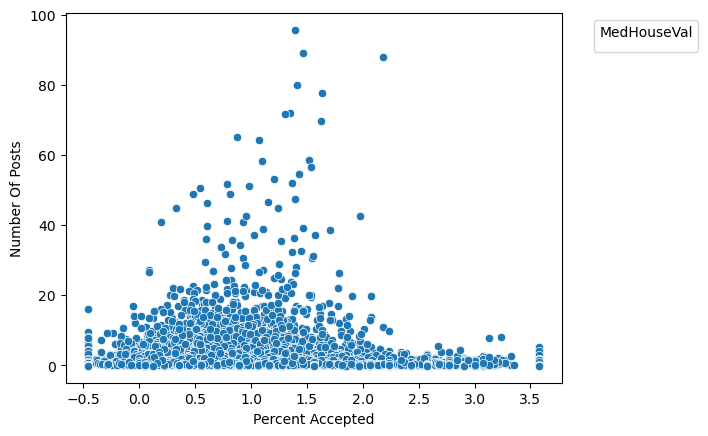

In [25]:
import seaborn

seaborn.scatterplot(y = 'Number Of Posts', x = 'Percent Accepted', data = stack_df)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

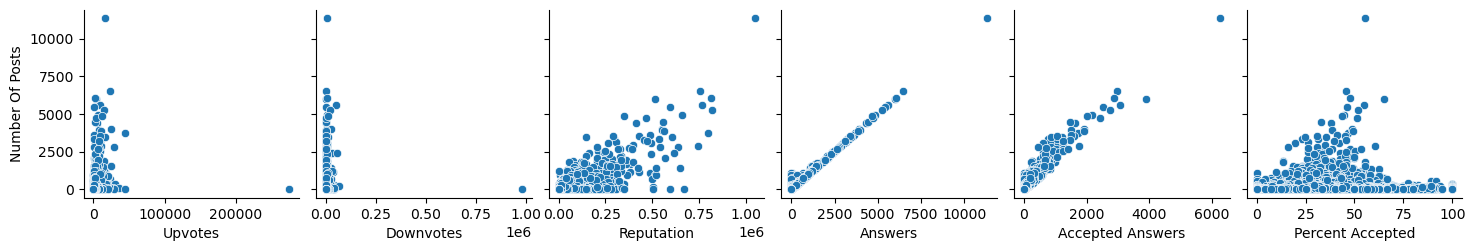

In [29]:
seaborn.pairplot(stack_df, x_vars = ['Upvotes', 'Downvotes', 'Reputation', 'Answers', 'Accepted Answers', 'Percent Accepted'], y_vars = ['Number Of Posts'])

In [5]:
stack_df['Upvotes'] = (stack_df['Upvotes'] - stack_df['Upvotes'].mean())/ stack_df['Upvotes'].std()
stack_df['Downvotes'] = (stack_df['Downvotes'] - stack_df['Downvotes'].mean())/ stack_df['Downvotes'].std()
stack_df['Reputation'] = (stack_df['Reputation'] - stack_df['Reputation'].mean())/ stack_df['Reputation'].std()
stack_df['Answers'] = (stack_df['Answers'] - stack_df['Answers'].mean())/ stack_df['Answers'].std()
stack_df['Accepted Answers'] = (stack_df['Accepted Answers'] - stack_df['Accepted Answers'].mean())/ stack_df['Accepted Answers'].std()
stack_df['Percent Accepted'] = (stack_df['Percent Accepted'] - stack_df['Percent Accepted'].mean())/ stack_df['Percent Accepted'].std()
stack_df['Number Of Posts'] = (stack_df['Number Of Posts'] - stack_df['Number Of Posts'].mean())/ stack_df['Number Of Posts'].std()

In [6]:
#Curve Fitting using Linear Regression
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
class Curve:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def func(self):
        x_linear = np.array(self.x)
        y_linear = np.array(self.y)
        x_linear_reshaped = x_linear.reshape(-1,1)
        linear_model = LinearRegression()
        linear_model.fit(x_linear_reshaped, y_linear)
        y_linear_pred = linear_model.predict(x_linear_reshaped)
        plt.scatter(x_linear, y_linear, color= 'blue', label='Data')
        plt.plot(x_linear, y_linear_pred, color='red', label='Fitted Line')
        plt.title('Linear Regression')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()


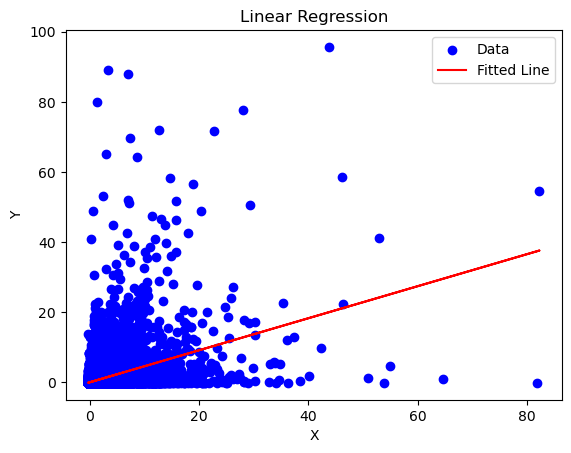

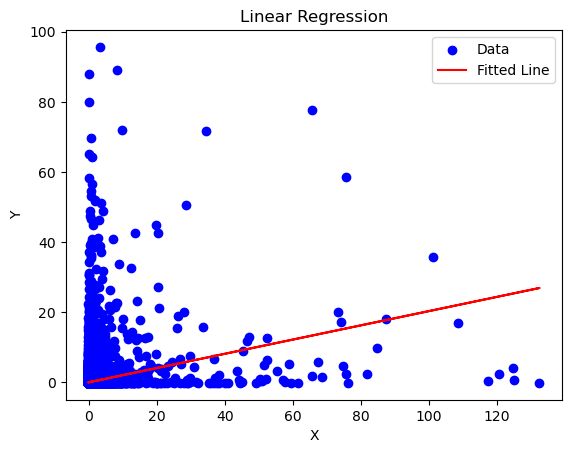

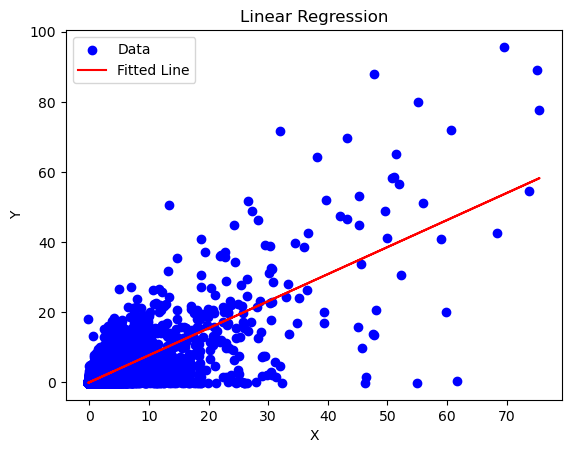

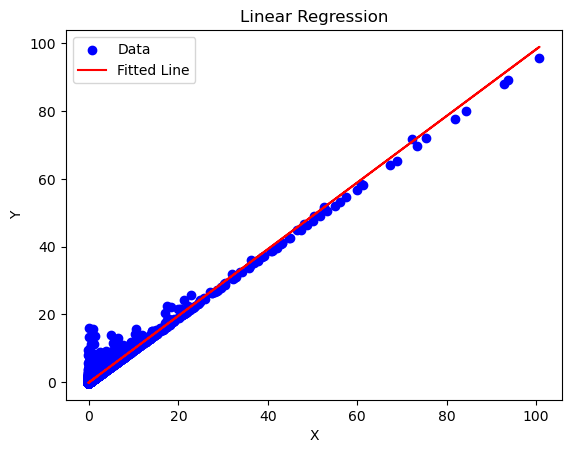

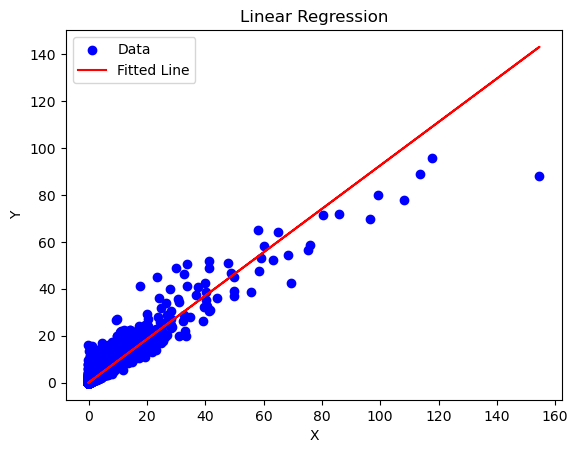

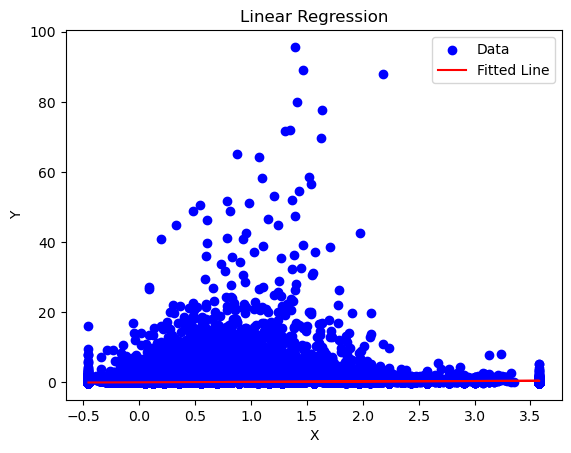

In [7]:
up = Curve(stack_df["Upvotes"], stack_df["Number Of Posts"])
down = Curve(stack_df["Downvotes"], stack_df["Number Of Posts"])
rep = Curve(stack_df["Reputation"], stack_df["Number Of Posts"])
ans = Curve(stack_df["Answers"], stack_df["Number Of Posts"])
acc = Curve(stack_df["Accepted Answers"], stack_df["Number Of Posts"])
per = Curve(stack_df["Percent Accepted"], stack_df["Number Of Posts"])
up.func()
down.func()
rep.func()
ans.func()
acc.func()
per.func()

In [8]:
# Ordinary Least Squares
import statsmodels.api as sm
class LeastSquarestrn:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def func(self):    
        x = stack_df[self.x].tolist()
        y = stack_df[self.y].tolist()
        x = sm.add_constant(x)
        result = sm.OLS(y,x).fit()
        print(result.summary())
    

In [9]:
up = LeastSquarestrn("Upvotes","Number Of Posts")
down = LeastSquarestrn("Downvotes","Number Of Posts")
rep = LeastSquarestrn("Reputation","Number Of Posts")
ans = LeastSquarestrn("Answers","Number Of Posts")
acc = LeastSquarestrn("Accepted Answers","Number Of Posts")
per = LeastSquarestrn("Percent Accepted","Number Of Posts")
up.func()
down.func()
rep.func()
ans.func()
acc.func()
per.func()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                 7.891e+04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:18:23   Log-Likelihood:            -3.8980e+05
No. Observations:              299393   AIC:                         7.796e+05
Df Residuals:                  299391   BIC:                         7.796e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.533e-15      0.002  -1.56e-12      1.0

In [10]:
class LeastSquares:
    def __init__(self, x, y, coef, const):
        self.x = x
        self.y = y
        self.coef = coef
        self.const = const

    def func(self):
        x = stack_df[self.x].tolist()
        y = stack_df[self.y].tolist()
        plt.scatter(x,y)
        max_x = stack_df[self.x].max()
        min_x = stack_df[self.x].min()
        x = np.arange(min_x, max_x, 1)
        y = self.coef * x - self.const
        plt.plot(y, 'r')
        plt.show()

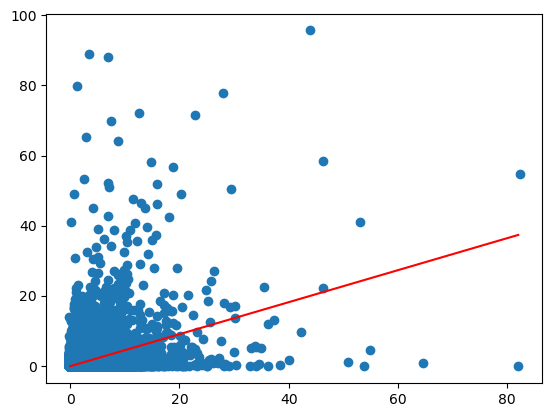

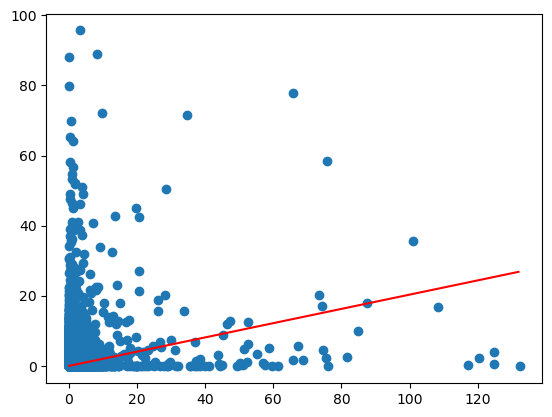

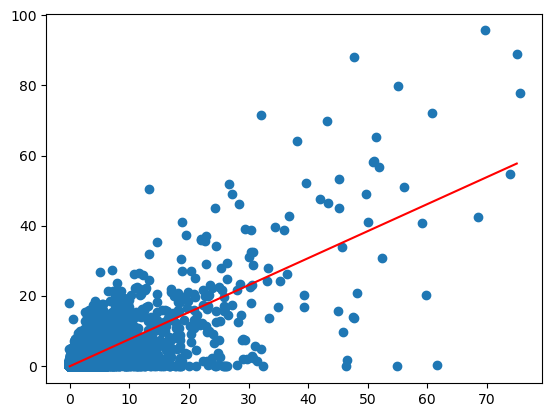

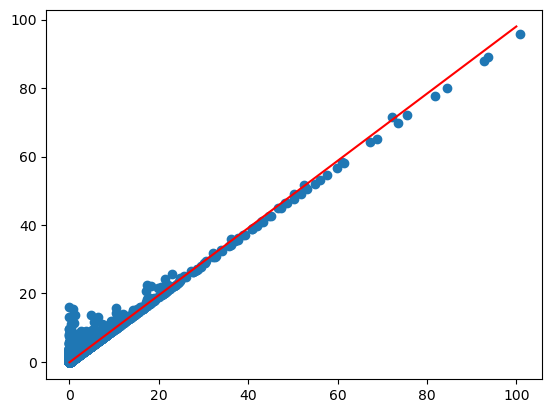

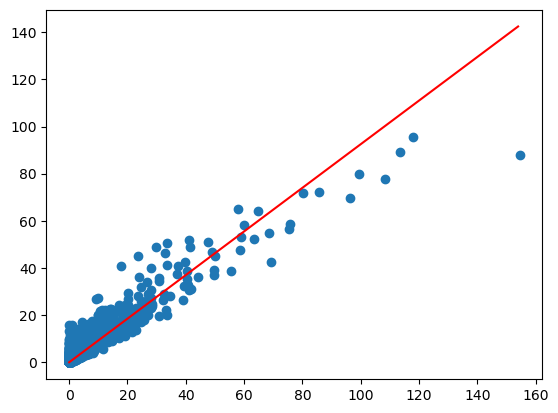

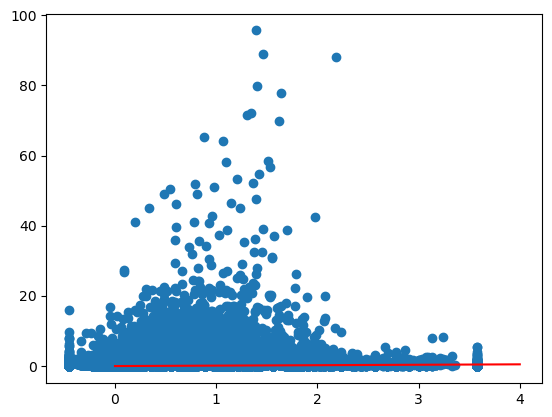

In [11]:
up = LeastSquares("Upvotes", "Number Of Posts", 0.4567, -2.533e-15)
down = LeastSquares("Downvotes", "Number Of Posts", 0.2032, -2.533e-15)
rep = LeastSquares("Reputation", "Number Of Posts", 0.7709, -2.533e-15)
ans = LeastSquares("Answers", "Number Of Posts", 0.9813, -2.533e-15)
acc = LeastSquares("Accepted Answers", "Number Of Posts", 0.9258, -2.533e-15)
per = LeastSquares("Percent Accepted", "Number Of Posts",0.1226, -2.533e-15)
up.func()
down.func()
rep.func()
ans.func()
acc.func()
per.func()